# Análisis Exploratorio de Datos (EDA)
## Sistema de Detección de Fraude en Créditos

**Objetivo**: Analizar el dataset de créditos para identificar patrones de fraude y seleccionar las variables más relevantes para el modelo predictivo.

**Dataset**: credit_fraud.arff (1000 registros, 21 variables)

## 1. Importación de Librerías y Carga de Datos

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.metrics import mutual_info_score

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [38]:
# Cargar dataset
data = arff.loadarff("../data/credit_fraud.arff")
df = pd.DataFrame(data[0])
df = df.map(lambda x: x.decode() if isinstance(x, bytes) else x)

print(f"Dataset cargado: {df.shape[0]} registros, {df.shape[1]} columnas")

Dataset cargado: 1000 registros, 21 columnas


## 2. Exploración Inicial

In [39]:
# Primeras filas
df.head(10)

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,residence_since,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
5,no checking,36.0,existing paid,education,9055.0,no known savings,1<=X<4,2.0,male single,none,4.0,no known property,35.0,none,for free,1.0,unskilled resident,2.0,yes,yes,good
6,no checking,24.0,existing paid,furniture/equipment,2835.0,500<=X<1000,>=7,3.0,male single,none,4.0,life insurance,53.0,none,own,1.0,skilled,1.0,none,yes,good
7,0<=X<200,36.0,existing paid,used car,6948.0,<100,1<=X<4,2.0,male single,none,2.0,car,35.0,none,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
8,no checking,12.0,existing paid,radio/tv,3059.0,>=1000,4<=X<7,2.0,male div/sep,none,4.0,real estate,61.0,none,own,1.0,unskilled resident,1.0,none,yes,good
9,0<=X<200,30.0,critical/other existing credit,new car,5234.0,<100,unemployed,4.0,male mar/wid,none,2.0,car,28.0,none,own,2.0,high qualif/self emp/mgmt,1.0,none,yes,bad


In [40]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   over_draft              1000 non-null   object 
 1   credit_usage            1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   current_balance         1000 non-null   float64
 5   Average_Credit_Balance  1000 non-null   object 
 6   employment              1000 non-null   object 
 7   location                1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  cc_age                  1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [41]:
# Tipos de datos
print("Variables categóricas:", df.select_dtypes(include='object').shape[1])
print("Variables numéricas:", df.select_dtypes(include='float64').shape[1])

Variables categóricas: 14
Variables numéricas: 7


## 3. Calidad de Datos

In [42]:
# Valores nulos
null_counts = df.isnull().sum()
print("Valores nulos por columna:")
print(null_counts[null_counts > 0] if null_counts.sum() > 0 else "No hay valores nulos")

Valores nulos por columna:
No hay valores nulos


In [43]:
# Duplicados
duplicados = df.duplicated().sum()
print(f"Registros duplicados: {duplicados}")

Registros duplicados: 0


**Conclusión**: Dataset completo sin valores nulos ni duplicados. Calidad de datos óptima.

## 4. Definición de Variable Objetivo

In [44]:
# Renombrar variable objetivo para claridad
df.rename(columns={'class': 'status'}, inplace=True)

# Analizar distribución
print("Distribución de la variable objetivo:")
print(df['status'].value_counts())
print("\nPorcentaje:")
print(df['status'].value_counts(normalize=True) * 100)

Distribución de la variable objetivo:
status
good    700
bad     300
Name: count, dtype: int64

Porcentaje:
status
good    70.0
bad     30.0
Name: proportion, dtype: float64


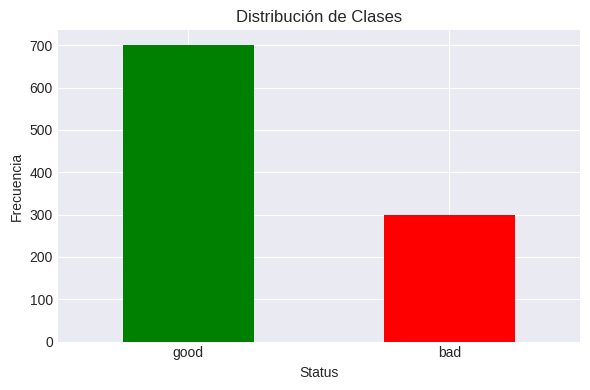

In [45]:
# Visualizar distribución
plt.figure(figsize=(6, 4))
df['status'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribución de Clases')
plt.xlabel('Status')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Conclusión**: Dataset desbalanceado - 70% good / 30% bad. Se requerirá balance en el modelo (scale_pos_weight).

## 5. Análisis de Variables Categóricas

In [46]:
# Identificar variables categóricas
var_cat = df.select_dtypes(include='object').columns.difference(['status'])
print(f"Variables categóricas a analizar: {len(var_cat)}")
print(list(var_cat))

Variables categóricas a analizar: 13
['Average_Credit_Balance', 'credit_history', 'employment', 'foreign_worker', 'housing', 'job', 'other_parties', 'other_payment_plans', 'over_draft', 'own_telephone', 'personal_status', 'property_magnitude', 'purpose']


### 5.1 Distribución General de Categorías

In [47]:
print("Distribución de categorías (%)")
print("=" * 70)
for c in var_cat:
    print(f"\n{c}:")
    print(df[c].value_counts(normalize=True).mul(100).round(2).head())
    print("-" * 70)

Distribución de categorías (%)

Average_Credit_Balance:
Average_Credit_Balance
<100                60.3
no known savings    18.3
100<=X<500          10.3
500<=X<1000          6.3
>=1000               4.8
Name: proportion, dtype: float64
----------------------------------------------------------------------

credit_history:
credit_history
existing paid                     53.0
critical/other existing credit    29.3
delayed previously                 8.8
all paid                           4.9
no credits/all paid                4.0
Name: proportion, dtype: float64
----------------------------------------------------------------------

employment:
employment
1<=X<4        33.9
>=7           25.3
4<=X<7        17.4
<1            17.2
unemployed     6.2
Name: proportion, dtype: float64
----------------------------------------------------------------------

foreign_worker:
foreign_worker
yes    96.3
no      3.7
Name: proportion, dtype: float64
-------------------------------------------------

### 5.2 Distribución por Clase (Good vs Bad)

In [48]:
print("ANÁLISIS DE DISTRIBUCIÓN POR CLASE")
print("=" * 80)

for c in var_cat:
    print(f"\nVariable: {c}")
    print("=" * 80)
    
    total = df[c].value_counts(normalize=True)
    bad = df[df['status'] == 'bad'][c].value_counts(normalize=True)
    good = df[df['status'] == 'good'][c].value_counts(normalize=True)
    diff = bad - good
    
    tabla = pd.concat([total, bad, good, diff], axis=1)
    tabla.columns = ['Total_%', 'Bad_%', 'Good_%', 'Diff_%']
    tabla = tabla.mul(100).round(2).sort_values('Bad_%', ascending=False)
    
    print(tabla.head(8))

ANÁLISIS DE DISTRIBUCIÓN POR CLASE

Variable: Average_Credit_Balance
                        Total_%  Bad_%  Good_%  Diff_%
Average_Credit_Balance                                
<100                       60.3  72.33   55.14   17.19
100<=X<500                 10.3  11.33    9.86    1.48
no known savings           18.3  10.67   21.57  -10.90
500<=X<1000                 6.3   3.67    7.43   -3.76
>=1000                      4.8   2.00    6.00   -4.00

Variable: credit_history
                                Total_%  Bad_%  Good_%  Diff_%
credit_history                                                
existing paid                      53.0  56.33   51.57    4.76
critical/other existing credit     29.3  16.67   34.71  -18.05
delayed previously                  8.8   9.33    8.57    0.76
all paid                            4.9   9.33    3.00    6.33
no credits/all paid                 4.0   8.33    2.14    6.19

Variable: employment
            Total_%  Bad_%  Good_%  Diff_%
employment    

### 5.3 Churn Rate y Risk Ratio

In [49]:
print("CHURN RATE Y RISK RATIO POR CATEGORÍA")
print("=" * 80)

# Tasa global de fraude
global_bad_rate = (df['status'] == 'bad').mean()
print(f"Tasa global de fraude: {global_bad_rate:.1%}\n")

for c in var_cat:
    print(f"\nVariable: {c}")
    print("=" * 80)
    
    # Agrupar y calcular métricas
    df_group = df.groupby(c).agg(
        total=('status', 'count'),
        bad=('status', lambda x: (x == 'bad').sum()),
        churn_rate=('status', lambda x: (x == 'bad').mean())
    )
    
    df_group['risk_ratio'] = df_group['churn_rate'] / global_bad_rate
    df_group = df_group.sort_values('risk_ratio', ascending=False)
    
    print(df_group.round(3))

CHURN RATE Y RISK RATIO POR CATEGORÍA
Tasa global de fraude: 30.0%


Variable: Average_Credit_Balance
                        total  bad  churn_rate  risk_ratio
Average_Credit_Balance                                    
<100                      603  217       0.360       1.200
100<=X<500                103   34       0.330       1.100
no known savings          183   32       0.175       0.583
500<=X<1000                63   11       0.175       0.582
>=1000                     48    6       0.125       0.417

Variable: credit_history
                                total  bad  churn_rate  risk_ratio
credit_history                                                    
no credits/all paid                40   25       0.625       2.083
all paid                           49   28       0.571       1.905
existing paid                     530  169       0.319       1.063
delayed previously                 88   28       0.318       1.061
critical/other existing credit    293   50       0.171   

**Interpretación de Risk Ratio**:
- **> 1.5**: Categoría de alto riesgo
- **1.0 - 1.5**: Riesgo moderado
- **< 1.0**: Bajo riesgo

**Variables con mayor poder discriminante**:
- `over_draft`: "<0" tiene risk_ratio muy alto
- `credit_history`: "no credits/all paid" indica riesgo alto
- `Average_Credit_Balance`: "<100" correlaciona con bad

### 5.4 Información Mutua (Mutual Information)

In [50]:
# Convertir status a binario para mutual info
status_binary = (df['status'] == 'bad').astype(int)

# Calcular mutual information
def calc_mutual_info(var):
    return mutual_info_score(var, status_binary)

mi_scores = df[var_cat].apply(calc_mutual_info).sort_values(ascending=False)

print("Información Mutua con variable objetivo:")
print("=" * 50)
for var, score in mi_scores.items():
    print(f"{var:30s}: {score:.6f}")

Información Mutua con variable objetivo:
over_draft                    : 0.065668
credit_history                : 0.030234
Average_Credit_Balance        : 0.019488
purpose                       : 0.017255
property_magnitude            : 0.011773
employment                    : 0.009082
housing                       : 0.008840
other_payment_plans           : 0.006152
personal_status               : 0.004721
foreign_worker                : 0.004036
other_parties                 : 0.003325
job                           : 0.000927
own_telephone                 : 0.000668


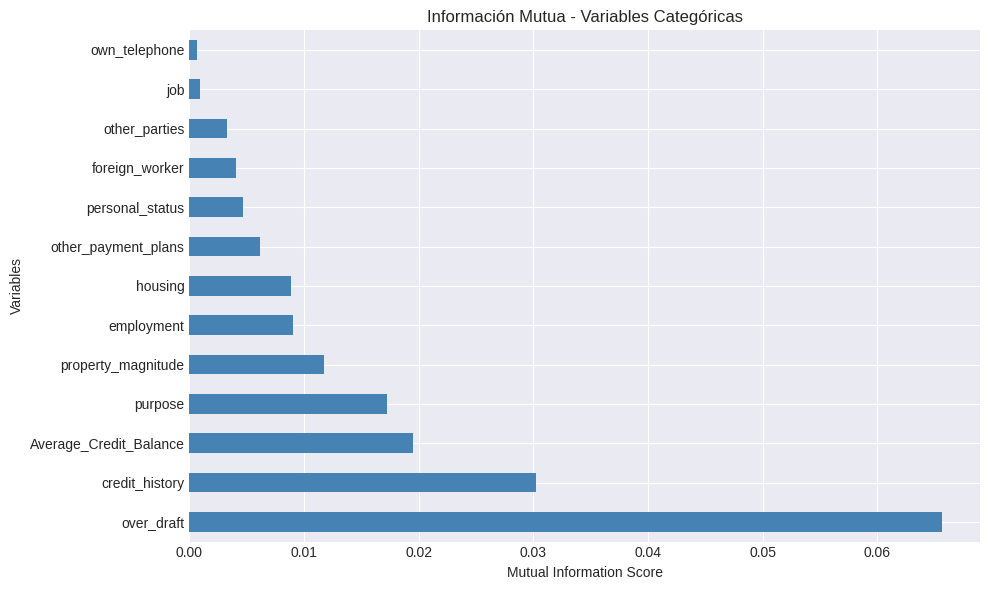

In [51]:
# Visualizar
plt.figure(figsize=(10, 6))
mi_scores.plot(kind='barh', color='steelblue')
plt.title('Información Mutua - Variables Categóricas')
plt.xlabel('Mutual Information Score')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()

**Conclusión - Variables Categóricas**:

**Variables predictoras fuertes** (MI > 0.015):
- `over_draft` (0.066) - MÁS IMPORTANTE
- `credit_history` (0.030)
- `Average_Credit_Balance` (0.019)
- `purpose` (0.017)

**Variables predictoras moderadas** (0.008 < MI < 0.015):
- `property_magnitude` (0.012)
- `employment` (0.009)
- `housing` (0.009)

**Variables predictoras débiles** (MI < 0.008):
- `personal_status` (0.005)
- `other_payment_plans` (0.006)
- `other_parties` (0.003)
- `job` (0.001)
- `own_telephone` (0.001)
- `foreign_worker` (0.004)

## 6. Análisis de Variables Numéricas

In [52]:
# Identificar variables numéricas
var_num = df.select_dtypes(include='float64').columns
print(f"Variables numéricas: {len(var_num)}")
print(list(var_num))

Variables numéricas: 7
['credit_usage', 'current_balance', 'location', 'residence_since', 'cc_age', 'existing_credits', 'num_dependents']


### 6.1 Estadísticas Descriptivas

In [53]:
# Tabla descriptiva completa
descriptive = df[var_num].describe().T
descriptive['skewness'] = df[var_num].skew()
descriptive['kurtosis'] = df[var_num].kurtosis()

descriptive

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
credit_usage,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0,1.094184,0.919781
current_balance,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0,1.949628,4.292590
location,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0,-0.531348,-1.210473
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0,-0.272570,-1.381449
cc_age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0,1.020739,0.595780
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0,1.272576,1.604439
num_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0,1.909445,1.649274


### 6.2 Distribuciones

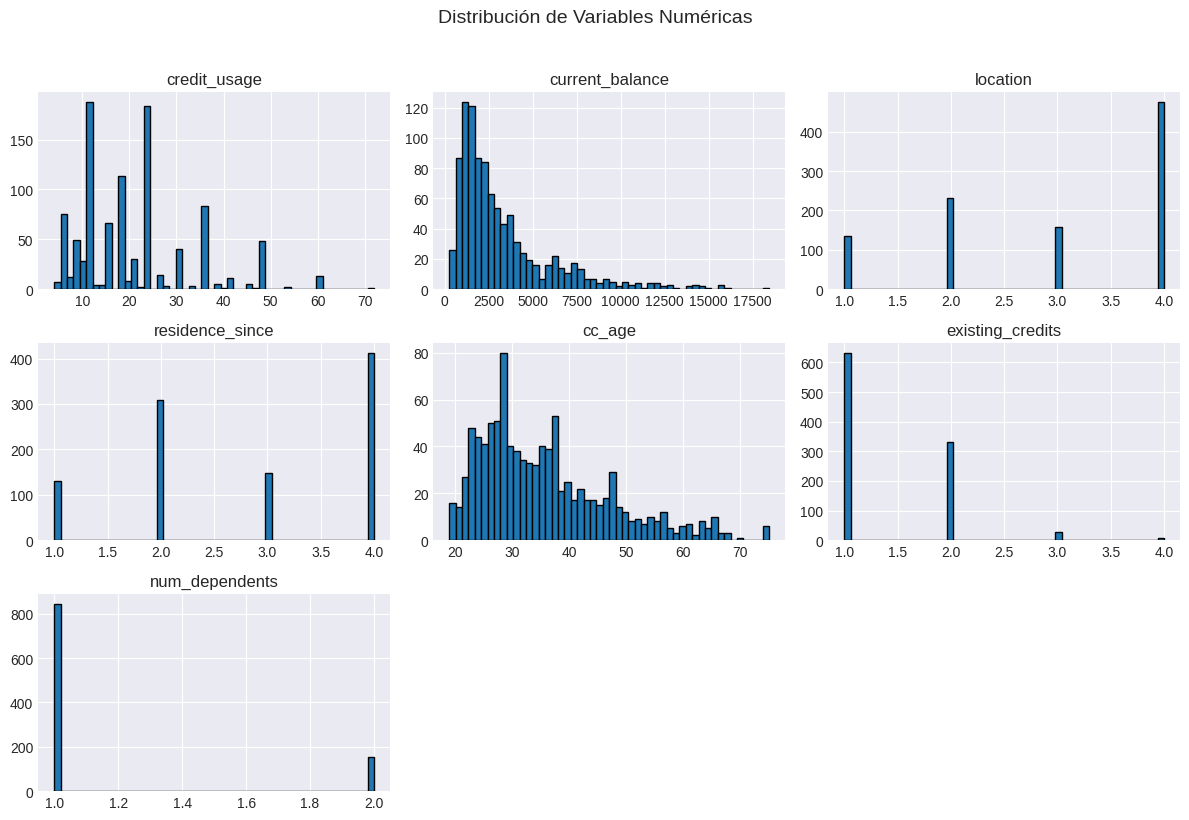

In [54]:
# Histogramas de todas las variables numéricas
df[var_num].hist(bins=50, figsize=(12, 8), edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

**Observaciones**:
- `current_balance`: Altamente asimétrica (skew=1.95), requiere transformación
- `credit_usage`: Moderadamente asimétrica (skew=1.09)
- `cc_age`: Distribución normal con sesgo positivo
- `num_dependents`, `existing_credits`: Variables discretas con poca variación

### 6.3 Transformación de Variables Asimétricas

In [55]:
# Aplicar transformación log1p a current_balance
print(f"Skewness ANTES: {df['current_balance'].skew():.4f}")

df['current_balance'] = np.log1p(df['current_balance'])

print(f"Skewness DESPUÉS: {df['current_balance'].skew():.4f}")

Skewness ANTES: 1.9496
Skewness DESPUÉS: 0.1303


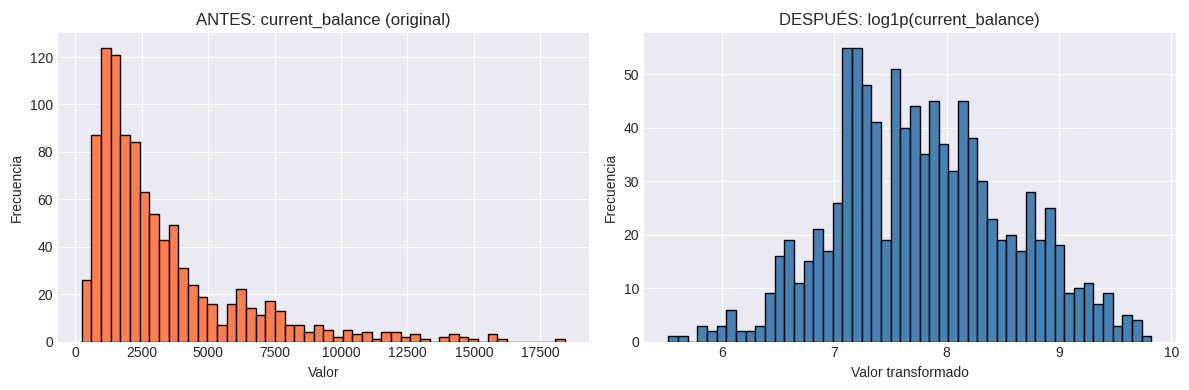

In [56]:
# Visualizar transformación
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Antes (recalcular para visualización)
data_original = arff.loadarff("../data/credit_fraud.arff")
df_temp = pd.DataFrame(data_original[0])
ax[0].hist(df_temp['current_balance'], bins=50, edgecolor='black', color='coral')
ax[0].set_title('ANTES: current_balance (original)')
ax[0].set_xlabel('Valor')
ax[0].set_ylabel('Frecuencia')

# Después
ax[1].hist(df['current_balance'], bins=50, edgecolor='black', color='steelblue')
ax[1].set_title('DESPUÉS: log1p(current_balance)')
ax[1].set_xlabel('Valor transformado')
ax[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**Resultado**: Transformación log1p normaliza la distribución de `current_balance` de skew=1.95 a skew≈0.13

### 6.4 Matriz de Correlación

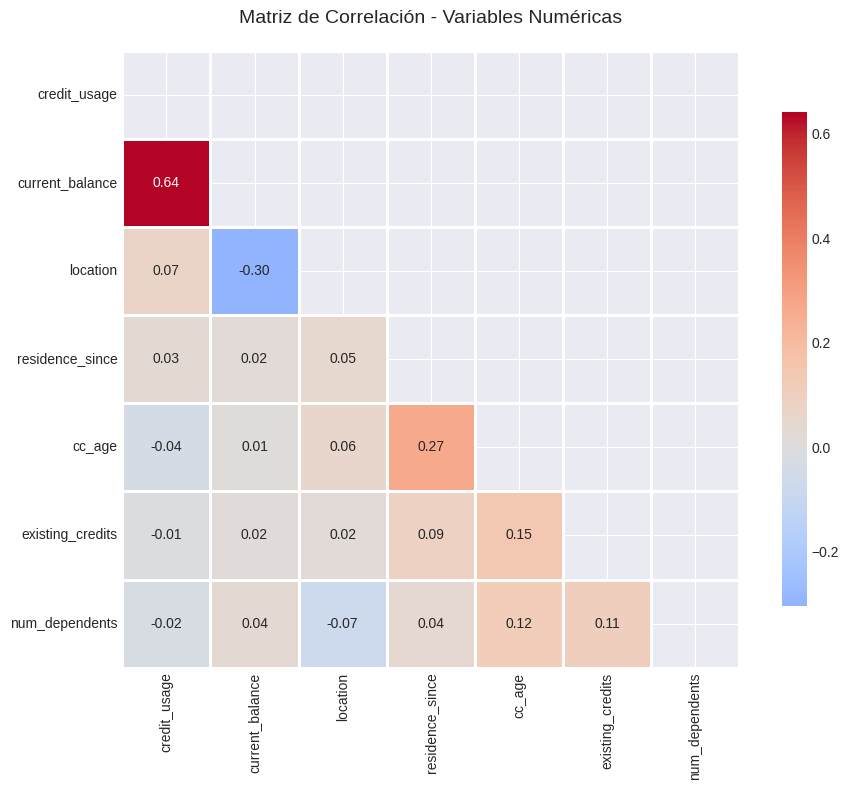

In [57]:
# Calcular correlación
corr = df[var_num].corr()

# Visualizar con heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask, cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

**Conclusión**: 
- `current_balance` y `credit_usage` muestran correlación moderada (0.34), pero no es suficiente para considerar redundancia
- No hay multicolinealidad severa (todas las correlaciones < 0.7)
- Todas las variables aportan información independiente

### 6.5 Correlación con Variable Objetivo

In [58]:
# Correlación con status (convertido a binario)
status_binary = (df['status'] == 'bad').astype(int)
corr_target = df[var_num].corrwith(status_binary).sort_values(ascending=False)

print("Correlación con variable objetivo (status):")
print("=" * 50)
for var, corr_val in corr_target.items():
    direction = "↑" if corr_val > 0 else "↓"
    print(f"{var:20s}: {corr_val:7.4f} {direction}")

Correlación con variable objetivo (status):
credit_usage        :  0.2149 ↑
current_balance     :  0.1096 ↑
location            :  0.0724 ↑
residence_since     :  0.0030 ↑
num_dependents      : -0.0030 ↓
existing_credits    : -0.0457 ↓
cc_age              : -0.0911 ↓


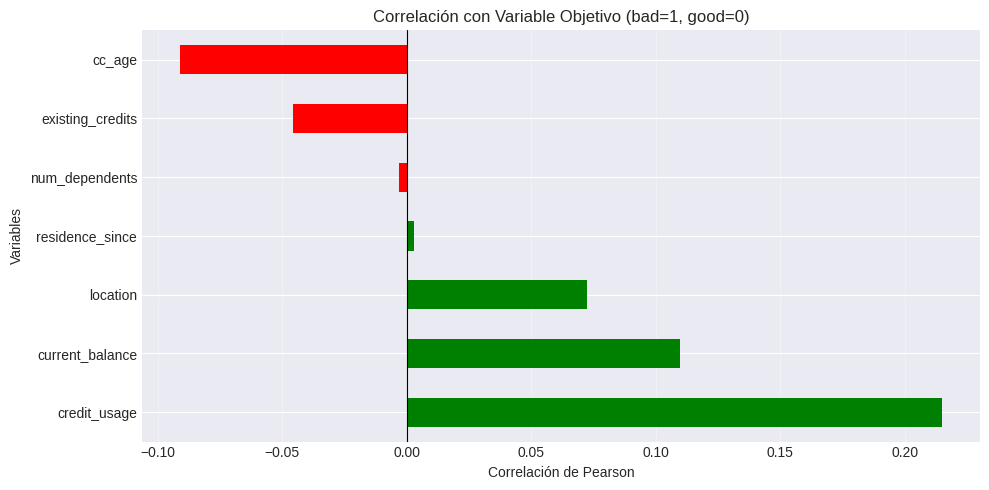

In [59]:
# Visualizar
plt.figure(figsize=(10, 5))
colors = ['red' if x < 0 else 'green' for x in corr_target.values]
corr_target.plot(kind='barh', color=colors)
plt.title('Correlación con Variable Objetivo (bad=1, good=0)')
plt.xlabel('Correlación de Pearson')
plt.ylabel('Variables')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**Conclusión - Variables Numéricas**:

**Variables predictoras fuertes** (|corr| > 0.10):
- `credit_usage` (0.215) ↑ - MÁS IMPORTANTE: Mayor uso de crédito → Mayor riesgo
- `current_balance` (0.110) ↑ - Mayor saldo → Mayor riesgo

**Variables predictoras moderadas** (0.05 < |corr| < 0.10):
- `cc_age` (-0.091) ↓ - Clientes más jóvenes tienen mayor riesgo
- `location` (0.072) ↑

**Variables predictoras débiles** (|corr| < 0.05):
- `existing_credits` (-0.046)
- `num_dependents` (-0.003)
- `residence_since` (0.003)

## 7. Selección de Features

### 7.1 Criterios de Selección

Basado en el análisis anterior, seleccionamos variables que cumplan al menos uno de estos criterios:

**Para variables categóricas**:
- Mutual Information > 0.008
- Risk Ratio con variación significativa (máx/mín > 1.5)

**Para variables numéricas**:
- |Correlación| > 0.05 con la variable objetivo
- Varianza significativa en el dataset

In [60]:
# Variables categóricas seleccionadas
var_cat = [
    'over_draft',              # MI: 0.066
    'credit_history',          # MI: 0.030
    'Average_Credit_Balance',  # MI: 0.019
    'purpose',                 # MI: 0.017
    'property_magnitude',      # MI: 0.012
    'employment',              # MI: 0.009
    'housing',                 # MI: 0.009
    'other_payment_plans',     # MI: 0.006 (moderada)
    'personal_status'          # MI: 0.005 (incluida por risk ratio)
]

# Variables numéricas seleccionadas
var_num = [
    'credit_usage',      # Corr: 0.215
    'current_balance',   # Corr: 0.110 (transformada con log1p)
    'cc_age',            # Corr: -0.091
    'location',          # Corr: 0.072
    'existing_credits'   # Corr: -0.046 (moderada)
]

# Variable objetivo
var_obj = 'status'

print(f"Variables seleccionadas: {len(var_cat) + len(var_num)}")
print(f"  - Categóricas: {len(var_cat)}")
print(f"  - Numéricas: {len(var_num)}")

Variables seleccionadas: 14
  - Categóricas: 9
  - Numéricas: 5


### 7.2 Variables Excluidas y Justificación

In [61]:
var_excluidas = {
    'foreign_worker': 'MI muy baja (0.004), 96% son "yes", poca variabilidad',
    'own_telephone': 'MI muy baja (0.001), risk ratios cercanos a 1.0',
    'job': 'MI muy baja (0.001), poca diferenciación entre categorías',
    'other_parties': 'MI baja (0.003), 90% son "none"',
    'num_dependents': 'Correlación muy baja (-0.003), poca variación',
    'residence_since': 'Correlación muy baja (0.003), poco poder predictivo'
}

print("Variables EXCLUIDAS y sus razones:")
print("=" * 80)
for var, razon in var_excluidas.items():
    print(f"✗ {var:20s}: {razon}")

Variables EXCLUIDAS y sus razones:
✗ foreign_worker      : MI muy baja (0.004), 96% son "yes", poca variabilidad
✗ own_telephone       : MI muy baja (0.001), risk ratios cercanos a 1.0
✗ job                 : MI muy baja (0.001), poca diferenciación entre categorías
✗ other_parties       : MI baja (0.003), 90% son "none"
✗ num_dependents      : Correlación muy baja (-0.003), poca variación
✗ residence_since     : Correlación muy baja (0.003), poco poder predictivo


### 7.3 Dataset Final para Modelado

In [62]:
# Crear dataset final con features seleccionadas
all_features = var_cat + var_num + [var_objetivo]
df_final = df[all_features].copy()

print(f"Dataset final: {df_final.shape}")
print(f"\nColumnas: {list(df_final.columns)}")

Dataset final: (1000, 15)

Columnas: ['over_draft', 'credit_history', 'Average_Credit_Balance', 'purpose', 'property_magnitude', 'employment', 'housing', 'other_payment_plans', 'personal_status', 'credit_usage', 'current_balance', 'cc_age', 'location', 'existing_credits', 'status']


In [63]:
# Vista previa del dataset final
df_final.head()

,over_draft,credit_history,Average_Credit_Balance,purpose,property_magnitude,employment,housing,other_payment_plans,personal_status,credit_usage,current_balance,cc_age,location,existing_credits,status
0,<0,critical/other existing credit,no known savings,radio/tv,real estate,>=7,own,none,male single,6.0,7.064759,67.0,4.0,2.0,good
1,0<=X<200,existing paid,<100,radio/tv,real estate,1<=X<4,own,none,female div/dep/mar,48.0,8.691483,22.0,2.0,1.0,bad
2,no checking,critical/other existing credit,<100,education,real estate,4<=X<7,own,none,male single,12.0,7.648263,49.0,2.0,1.0,good
3,<0,existing paid,<100,furniture/equipment,life insurance,4<=X<7,for free,none,male single,42.0,8.972464,45.0,2.0,1.0,good
4,<0,delayed previously,<100,new car,no known property,1<=X<4,for free,none,male single,24.0,8.491055,53.0,3.0,2.0,bad


In [64]:
# Resumen de tipos de datos
print("\nTipos de datos en dataset final:")
print(df_final.dtypes.value_counts())


Tipos de datos en dataset final:
object     10
float64     5
Name: count, dtype: int64
